# Assignment 6
### Do Question 6, and three more questions of your choice.

In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy as sp

## 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

## 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

### A: Fair 3-sided die

In [ ]:
## Outcomes
outcome_space = list(range(1, 4))

## Events
event_space = []
for i in range(0, len(outcome_space)+1):
    for subset in itertools.combinations(outcome_space, i):
        event_space.append(set(subset))

print(outcome_space)
print(event_space)

[1, 2, 3]
[set(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}]


In [45]:
event_probs = {tuple(sorted(E)): round(len(E)/len(outcome_space), 2) for E in event_space}
event_probs

{(): 0.0,
 (1,): 0.33,
 (2,): 0.33,
 (3,): 0.33,
 (1, 2): 0.67,
 (1, 3): 0.67,
 (2, 3): 0.67,
 (1, 2, 3): 1.0}

### B: Fair coin twice

In [47]:
## Outcomes
outcome_space = ['hh', 'ht', 'th', 'tt']

## Events
event_space = []
for i in range(0, len(outcome_space)+1):
    for subset in itertools.combinations(outcome_space, i):
        event_space.append(set(subset))

print(outcome_space)
print(event_space)

['hh', 'ht', 'th', 'tt']
[set(), {'hh'}, {'ht'}, {'th'}, {'tt'}, {'ht', 'hh'}, {'th', 'hh'}, {'hh', 'tt'}, {'ht', 'th'}, {'ht', 'tt'}, {'th', 'tt'}, {'ht', 'hh', 'th'}, {'ht', 'hh', 'tt'}, {'th', 'hh', 'tt'}, {'ht', 'th', 'tt'}, {'ht', 'hh', 'th', 'tt'}]


In [49]:
event_probs = {tuple(sorted(E)): round(len(E)/len(outcome_space), 2) for E in event_space}
event_probs

{(): 0.0,
 ('hh',): 0.25,
 ('ht',): 0.25,
 ('th',): 0.25,
 ('tt',): 0.25,
 ('hh', 'ht'): 0.5,
 ('hh', 'th'): 0.5,
 ('hh', 'tt'): 0.5,
 ('ht', 'th'): 0.5,
 ('ht', 'tt'): 0.5,
 ('th', 'tt'): 0.5,
 ('hh', 'ht', 'th'): 0.75,
 ('hh', 'ht', 'tt'): 0.75,
 ('hh', 'th', 'tt'): 0.75,
 ('ht', 'th', 'tt'): 0.75,
 ('hh', 'ht', 'th', 'tt'): 1.0}

### C: Sum of two 3-sided die rolls

In [50]:
## Outcomes
roll_vals = list(range(1, 4))
outcome_space = [a + b for a in roll_vals for b in roll_vals]
outcome_space

[2, 3, 4, 3, 4, 5, 4, 5, 6]

In this case, the events consist of all possible combinations (i.e., subsets) of outcomes, including the empty set and the set of all outcomes.


## 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

### A: Fair six-sided die

In [51]:
## Define sample space
sample_space = list(range(1, 7))

# Define event space
event_space = []
for i in range(0, len(sample_space)+1):
    for subset in itertools.combinations(sample_space, i):
        event_space.append(set(subset))

In [42]:
prob_outcome = {x: 1/len(sample_space) for x in sample_space}
prob_outcome # all equally likely

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

In [43]:
prob_event = {tuple(sorted(E)): round(len(E)/len(sample_space), 2) for E in event_space}
prob_event

{(): 0.0,
 (1,): 0.17,
 (2,): 0.17,
 (3,): 0.17,
 (4,): 0.17,
 (5,): 0.17,
 (6,): 0.17,
 (1, 2): 0.33,
 (1, 3): 0.33,
 (1, 4): 0.33,
 (1, 5): 0.33,
 (1, 6): 0.33,
 (2, 3): 0.33,
 (2, 4): 0.33,
 (2, 5): 0.33,
 (2, 6): 0.33,
 (3, 4): 0.33,
 (3, 5): 0.33,
 (3, 6): 0.33,
 (4, 5): 0.33,
 (4, 6): 0.33,
 (5, 6): 0.33,
 (1, 2, 3): 0.5,
 (1, 2, 4): 0.5,
 (1, 2, 5): 0.5,
 (1, 2, 6): 0.5,
 (1, 3, 4): 0.5,
 (1, 3, 5): 0.5,
 (1, 3, 6): 0.5,
 (1, 4, 5): 0.5,
 (1, 4, 6): 0.5,
 (1, 5, 6): 0.5,
 (2, 3, 4): 0.5,
 (2, 3, 5): 0.5,
 (2, 3, 6): 0.5,
 (2, 4, 5): 0.5,
 (2, 4, 6): 0.5,
 (2, 5, 6): 0.5,
 (3, 4, 5): 0.5,
 (3, 4, 6): 0.5,
 (3, 5, 6): 0.5,
 (4, 5, 6): 0.5,
 (1, 2, 3, 4): 0.67,
 (1, 2, 3, 5): 0.67,
 (1, 2, 3, 6): 0.67,
 (1, 2, 4, 5): 0.67,
 (1, 2, 4, 6): 0.67,
 (1, 2, 5, 6): 0.67,
 (1, 3, 4, 5): 0.67,
 (1, 3, 4, 6): 0.67,
 (1, 3, 5, 6): 0.67,
 (1, 4, 5, 6): 0.67,
 (2, 3, 4, 5): 0.67,
 (2, 3, 4, 6): 0.67,
 (2, 3, 5, 6): 0.67,
 (2, 4, 5, 6): 0.67,
 (3, 4, 5, 6): 0.67,
 (1, 2, 3, 4, 5): 0.83,
 (1, 2, 

### B: Square root of (pips on) six-sided die

In [8]:
## Simulation
# Set seed for reproducibility
rng = np.random.default_rng(seed=405)

# Draw random values
n_sim = 5000
draws = np.sqrt(rng.integers(low=1, high=7, size=n_sim))

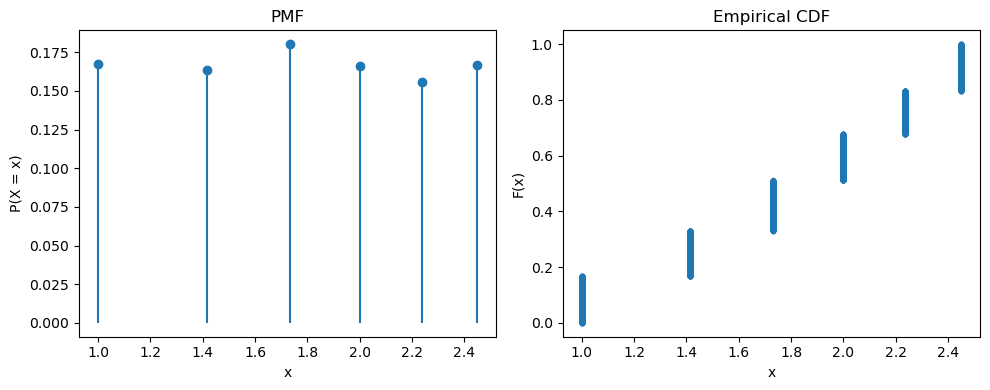

In [ ]:
# Compute PMF
unique, counts = np.unique(draws, return_counts=True)
pmf = counts / n_sim

# Compute ECDF
sorted_draws = np.sort(draws)
ecdf = np.arange(1, n_sim+1) / n_sim

# Plot PMF
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(unique, pmf, basefmt=" ")
plt.title("PMF")
plt.xlabel("x")
plt.ylabel("P(X = x)")

# Plot ECDF
plt.subplot(1, 2, 2)
plt.plot(sorted_draws, ecdf, marker=".", linestyle="none")
plt.title("Empirical CDF")
plt.xlabel("x")
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()

### C: Sum of two six-sided die

In [ ]:
## Sample space
pips = list(range(1, 7))

sample_space = {a + b for a in pips for b in pips}
sample_space

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

The *space of events* consists of all $2^{11}$ possible subsets of the sample space.

In [ ]:
## Outcome probabilities
outcomes = [a + b for a in pips for b in pips]

unique_outcomes, counts = np.unique(outcomes, return_counts=True)

outcome_probs = dict(zip(unique_outcomes, counts/counts.sum()))
outcome_probs

{np.int64(2): np.float64(0.027777777777777776),
 np.int64(3): np.float64(0.05555555555555555),
 np.int64(4): np.float64(0.08333333333333333),
 np.int64(5): np.float64(0.1111111111111111),
 np.int64(6): np.float64(0.1388888888888889),
 np.int64(7): np.float64(0.16666666666666666),
 np.int64(8): np.float64(0.1388888888888889),
 np.int64(9): np.float64(0.1111111111111111),
 np.int64(10): np.float64(0.08333333333333333),
 np.int64(11): np.float64(0.05555555555555555),
 np.int64(12): np.float64(0.027777777777777776)}

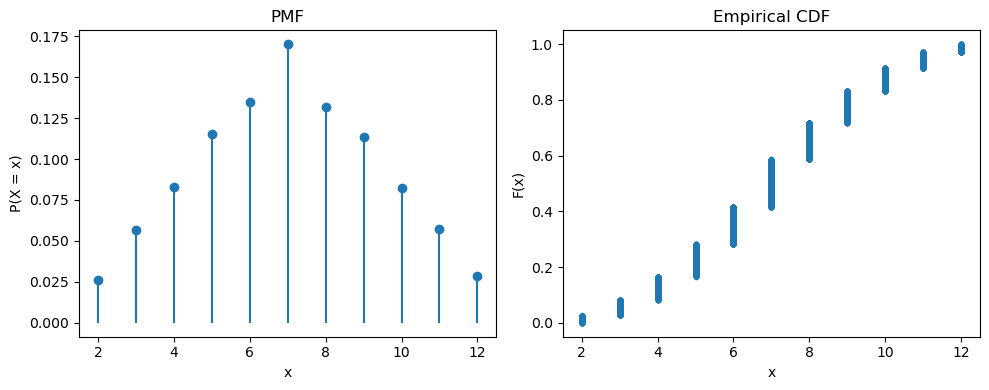

In [42]:
## Sim
rng = np.random.default_rng(seed=619)

n_sim = 10000
die1_rolls = rng.integers(low=1, high=7, size=n_sim)
die2_rolls = rng.integers(low=1, high=7, size=n_sim)
draws = die1_rolls + die2_rolls

# Compute PMF
unique, counts = np.unique(draws, return_counts=True)
pmf = counts / n_sim

# Compute ECDF
sorted_draws = np.sort(draws)
ecdf = np.arange(1, n_sim+1) / n_sim

# Plot PMF
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(unique, pmf, basefmt=" ")
plt.title("PMF")
plt.xlabel("x")
plt.ylabel("P(X = x)")

# Plot ECDF
plt.subplot(1, 2, 2)
plt.plot(sorted_draws, ecdf, marker=".", linestyle="none")
plt.title("Empirical CDF")
plt.xlabel("x")
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()

## 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

### A: Modeling roulette spins

In [11]:
numbers = list(range(37))

reds = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]

wheel = pd.DataFrame({
    'number': numbers,
    'color': ['green' if n == 0 else 'red' if n in reds else 'black' for n in numbers]
})

In [ ]:
def spin_wheel():
    return wheel.sample(1).iloc[0]

spin_wheel()

number     27
color     red
Name: 27, dtype: object

### B: Roulette wheel probability space

The sample space consists of all 37 numbers on the board; the event space consists of all $2^{37}$ subsets of the numbers (e.g., the "street" $\{1,2,3\}$); and the probability of an event is equal to its number of elements divided by 37 (e.g., $P(\{1,2,3\}) = 3/37$).

### C: Bet evaluation function

In [ ]:
## Add parity and dozen variables to wheel
wheel = pd.DataFrame({
    'number': numbers,
    'color': ['green' if n == 0 else 'red' if n in reds else 'black' for n in numbers],
    'parity': ['none' if n == 0 else 'even' if n % 2 == 0 else 'odd' for n in numbers],
    'dozen': ['none' if n == 0 else
              '1st 12' if 1 <= n <= 12 else
              '2nd 12' if 13 <= n <= 24 else
              '3rd 12' for n in numbers]
})

spin_wheel()

number         6
color      black
parity      even
dozen     1st 12
Name: 6, dtype: object

In [17]:
def evaluate_bet(bet, amount, spin_result):
    number = spin_result.number
    win = False
    payout_multiplier = 0

    # Infer bet type
    if isinstance(bet, int): # single number
        if number == bet:
            win = True,
            payout_multiplier = 35

    elif isinstance(bet, (list, set, tuple)): # multi-number
        size = len(bet)
        if number in bet:
            if size == 2: # split
                payout_multiplier = 17 
            elif size == 3: # street
                payout_multiplier = 11 
            elif size == 4: # square
                payout_multiplier = 8 
            elif size == 6: # line
                payout_multiplier = 5
            else:
                payout_multiplier = 36/(size-1) # generalized payout for size-n bets
            win = True

    elif isinstance(bet, str):
        if bet in ['red', 'black']: # color
            if spin_result.color == bet:
                win, payout_multiplier = True, 1
        elif bet in ['odd', 'even']: # parity
            if spin_result.parity == bet:
                win, payout_multiplier = True, 1
        elif bet in ['1st 12', '2nd 12', '3rd 12']: # dozen
            if spin_result.dozen == bet:
                win, payout_multiplier = True, 2
        else:
            raise ValueError(f"Unknown bet string: {bet}")

    else:
        raise ValueError(f"Unsupported bet type: {bet}")

    payout = amount * payout_multiplier if win else -amount
    return {
        'bet_value': bet,
        'spin_number': spin_result.number,
        'spin_color': spin_result.color,
        'win': win,
        'payout': payout,
        'payout_multiplier': payout_multiplier
    }

### D: Simulating bets

In [33]:
## Red
red_results = []
for i in range(1000):
    spin_result = spin_wheel()
    red_results.append(evaluate_bet('red', 1, spin_result)['payout'])

## Odd
odd_results = []
for i in range(1000):
    spin_result = spin_wheel()
    odd_results.append(evaluate_bet('odd', 1, spin_result)['payout'])

## 7
seven_results = []
for i in range(1000):
    spin_result = spin_wheel()
    seven_results.append(evaluate_bet(7, 1, spin_result)['payout'])

## Split
split_results = []
for i in range(1000):
    spin_result = spin_wheel()
    split_results.append(evaluate_bet([1,2], 1, spin_result)['payout'])

## Line
line_results = []
for i in range(1000):
    spin_result = spin_wheel()
    line_results.append(evaluate_bet([1,2,3,4,5,6], 1, spin_result)['payout'])

In [37]:
print(f'Red:', statistics.mean(red_results))
print(f'Odd:', statistics.mean(odd_results))
print(f'7:', statistics.mean(seven_results))
print(f'Split:', statistics.mean(split_results))
print(f'Line:', statistics.mean(line_results))

Red: -0.046
Odd: -0.024
7: 0.548
Split: 0.062
Line: -0.1


^^^ expected average payoffs (in dollars)

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


### A: Logistic

Support: $(-\infty, \infty)$

Density:
$$
F'(x; \sigma) = \dfrac{e^{-x/\sigma}}{\sigma(1+e^{-x/\sigma})^2}
$$

Theoretical PDF and CDF:

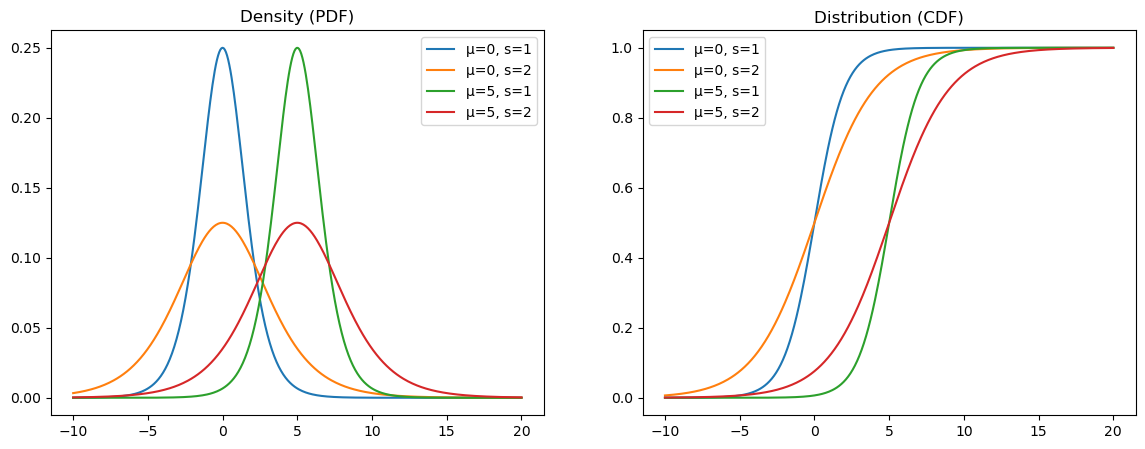

In [10]:
grid = np.linspace(-10,20,400)

## Parameter values
mus = [0, 5] # location
scales = [1, 2] # scale

fig, axes = plt.subplots(1,2,figsize=(14,5))

## PDFs
for mu in mus:
    for s in scales:
        pdf = sp.stats.logistic.pdf(grid, loc=mu, scale=s)
        sns.lineplot(x=grid, y=pdf, ax=axes[0], label=f'μ={mu}, s={s}')
axes[0].set_title('Density (PDF)')
axes[0].legend()

## CDFs
for mu in mus:
    for s in scales:
        cdf = sp.stats.logistic.cdf(grid, loc=mu, scale=s)
        sns.lineplot(x=grid, y=cdf, ax=axes[1], label=f'μ={mu}, s={s}')
axes[1].set_title('Distribution (CDF)')
axes[1].legend()

plt.show()

Random sample:

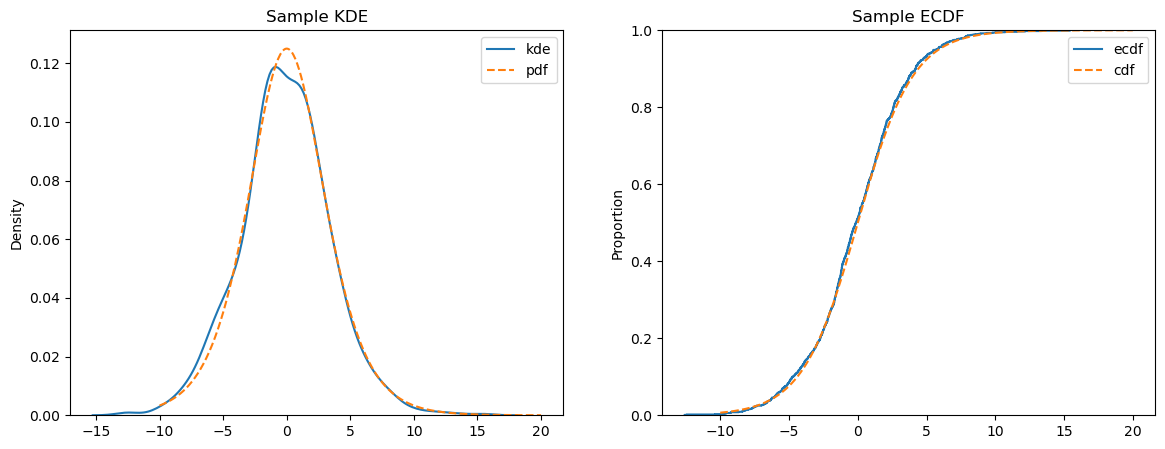

In [13]:
grid = np.linspace(-10,20,400)

pdf = sp.stats.logistic.pdf(grid, loc=0, scale=2)
cdf = sp.stats.logistic.cdf(grid, loc=0, scale=2)

sample = sp.stats.logistic.rvs(size=1000, loc=0, scale=2)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('Sample ECDF')
plt.show()